In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [7]:
# Load Dataset
file_path = (r"C:\Users\anjal\Downloads\Ecommerce_Sales_Prediction_Dataset.csv")  # Update path if needed
df = pd.read_csv(file_path)

In [9]:
df

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17
...,...,...,...,...,...,...,...
995,22-09-2025,Fashion,740.06,49.06,Regular,1890.83,34
996,23-09-2025,Electronics,517.10,28.48,Premium,8011.66,21
997,24-09-2025,Electronics,683.43,12.98,Occasional,3408.51,19
998,25-09-2025,Sports,51.26,21.85,Occasional,7335.62,26


In [11]:
# Display Basic Info
print("\n🔹 Initial Data Overview:")
print(df.info())
print("\n🔹 Descriptive Statistics:")
print(df.describe(include='all'))


🔹 Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB
None

🔹 Descriptive Statistics:
              Date Product_Category        Price     Discount  \
count         1000             1000  1000.000000  1000.000000   
unique        1000                5          NaN          NaN   
top     01-01-2023      Electronics          NaN          NaN   
freq             1              210          NaN          NaN   
mean           NaN        

In [13]:
# Handling Missing Values
df.fillna(df.mean(numeric_only=True), inplace=True)  # Numeric columns
df.fillna(df.mode().iloc[0], inplace=True)  # Categorical columns


In [15]:
df

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17
...,...,...,...,...,...,...,...
995,22-09-2025,Fashion,740.06,49.06,Regular,1890.83,34
996,23-09-2025,Electronics,517.10,28.48,Premium,8011.66,21
997,24-09-2025,Electronics,683.43,12.98,Occasional,3408.51,19
998,25-09-2025,Sports,51.26,21.85,Occasional,7335.62,26


In [17]:
# Encoding Categorical Variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [19]:

# Remove Duplicates
df.drop_duplicates(inplace=True)


In [21]:
df

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,0,3,932.80,35.82,0,6780.38,32
1,33,4,569.48,3.60,1,6807.56,16
2,66,2,699.68,3.56,1,3793.91,27
3,99,4,923.27,0.61,1,9422.75,29
4,132,4,710.17,47.83,1,1756.83,17
...,...,...,...,...,...,...,...
995,719,1,740.06,49.06,2,1890.83,34
996,752,0,517.10,28.48,1,8011.66,21
997,785,0,683.43,12.98,0,3408.51,19
998,818,3,51.26,21.85,0,7335.62,26


In [23]:
# Convert 'Date' column to datetime format
if 'Date' in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

In [25]:
df

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,1970-01-01 00:00:00.000000000,3,932.80,35.82,0,6780.38,32
1,1970-01-01 00:00:00.000000033,4,569.48,3.60,1,6807.56,16
2,1970-01-01 00:00:00.000000066,2,699.68,3.56,1,3793.91,27
3,1970-01-01 00:00:00.000000099,4,923.27,0.61,1,9422.75,29
4,1970-01-01 00:00:00.000000132,4,710.17,47.83,1,1756.83,17
...,...,...,...,...,...,...,...
995,1970-01-01 00:00:00.000000719,1,740.06,49.06,2,1890.83,34
996,1970-01-01 00:00:00.000000752,0,517.10,28.48,1,8011.66,21
997,1970-01-01 00:00:00.000000785,0,683.43,12.98,0,3408.51,19
998,1970-01-01 00:00:00.000000818,3,51.26,21.85,0,7335.62,26


In [27]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))


In [29]:
df

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,1970-01-01 00:00:00.000000000,0.695300,1.476139,0.755245,-1.216414,0.657777,0.326113
1,1970-01-01 00:00:00.000000033,1.393393,0.221781,-1.477181,-0.007255,0.667351,-1.876423
2,1970-01-01 00:00:00.000000066,-0.002792,0.671295,-1.479952,-0.007255,-0.394100,-0.362179
3,1970-01-01 00:00:00.000000099,1.393393,1.443236,-1.684349,-0.007255,1.588457,-0.086863
4,1970-01-01 00:00:00.000000132,1.393393,0.707511,1.587382,-0.007255,-1.111588,-1.738764
...,...,...,...,...,...,...,...
995,1970-01-01 00:00:00.000000719,-0.700885,0.810706,1.672605,1.201904,-1.064391,0.601430
996,1970-01-01 00:00:00.000000752,-1.398978,0.040940,0.246679,-0.007255,1.091452,-1.188130
997,1970-01-01 00:00:00.000000785,-1.398978,0.615192,-0.827269,-1.216414,-0.529843,-1.463447
998,1970-01-01 00:00:00.000000818,0.695300,-1.567366,-0.212694,-1.216414,0.853341,-0.499838


In [31]:
# Outlier Detection & Removal (Using IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [33]:
df

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,1970-01-01 00:00:00.000000000,0.695300,1.476139,0.755245,-1.216414,0.657777,0.326113
1,1970-01-01 00:00:00.000000033,1.393393,0.221781,-1.477181,-0.007255,0.667351,-1.876423
2,1970-01-01 00:00:00.000000066,-0.002792,0.671295,-1.479952,-0.007255,-0.394100,-0.362179
3,1970-01-01 00:00:00.000000099,1.393393,1.443236,-1.684349,-0.007255,1.588457,-0.086863
4,1970-01-01 00:00:00.000000132,1.393393,0.707511,1.587382,-0.007255,-1.111588,-1.738764
...,...,...,...,...,...,...,...
995,1970-01-01 00:00:00.000000719,-0.700885,0.810706,1.672605,1.201904,-1.064391,0.601430
996,1970-01-01 00:00:00.000000752,-1.398978,0.040940,0.246679,-0.007255,1.091452,-1.188130
997,1970-01-01 00:00:00.000000785,-1.398978,0.615192,-0.827269,-1.216414,-0.529843,-1.463447
998,1970-01-01 00:00:00.000000818,0.695300,-1.567366,-0.212694,-1.216414,0.853341,-0.499838


In [45]:
# Remove Infinite and NaN Values
df = df.copy()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [37]:
df

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,1970-01-01 00:00:00.000000000,0.695300,1.476139,0.755245,-1.216414,0.657777,0.326113
1,1970-01-01 00:00:00.000000033,1.393393,0.221781,-1.477181,-0.007255,0.667351,-1.876423
2,1970-01-01 00:00:00.000000066,-0.002792,0.671295,-1.479952,-0.007255,-0.394100,-0.362179
3,1970-01-01 00:00:00.000000099,1.393393,1.443236,-1.684349,-0.007255,1.588457,-0.086863
4,1970-01-01 00:00:00.000000132,1.393393,0.707511,1.587382,-0.007255,-1.111588,-1.738764
...,...,...,...,...,...,...,...
995,1970-01-01 00:00:00.000000719,-0.700885,0.810706,1.672605,1.201904,-1.064391,0.601430
996,1970-01-01 00:00:00.000000752,-1.398978,0.040940,0.246679,-0.007255,1.091452,-1.188130
997,1970-01-01 00:00:00.000000785,-1.398978,0.615192,-0.827269,-1.216414,-0.529843,-1.463447
998,1970-01-01 00:00:00.000000818,0.695300,-1.567366,-0.212694,-1.216414,0.853341,-0.499838


In [41]:
# Statistical Analysis
print("\n🔹 Correlation Matrix:")
print(df.corr())


🔹 Correlation Matrix:
                      Date  Product_Category     Price  Discount  \
Date              1.000000         -0.035786 -0.015652  0.008072   
Product_Category -0.035786          1.000000  0.009514  0.006022   
Price            -0.015652          0.009514  1.000000  0.032029   
Discount          0.008072          0.006022  0.032029  1.000000   
Customer_Segment -0.023957         -0.035750 -0.042561  0.025095   
Marketing_Spend   0.017607         -0.020745 -0.003251  0.011295   
Units_Sold        0.030197         -0.011137  0.020987 -0.037324   

                  Customer_Segment  Marketing_Spend  Units_Sold  
Date                     -0.023957         0.017607    0.030197  
Product_Category         -0.035750        -0.020745   -0.011137  
Price                    -0.042561        -0.003251    0.020987  
Discount                  0.025095         0.011295   -0.037324  
Customer_Segment          1.000000         0.014205    0.042991  
Marketing_Spend           0.014205  

In [47]:
# Select only numeric columns before type conversion
df[df.select_dtypes(include=[np.number]).columns] = df.select_dtypes(include=[np.number]).astype(np.float32)


In [55]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              994 non-null    datetime64[ns]
 1   Product_Category  994 non-null    float32       
 2   Price             994 non-null    float32       
 3   Discount          994 non-null    float32       
 4   Customer_Segment  994 non-null    float32       
 5   Marketing_Spend   994 non-null    float32       
 6   Units_Sold        994 non-null    float32       
dtypes: datetime64[ns](1), float32(6)
memory usage: 38.8 KB


In [57]:
# Final Shape
print("\n✅ Final Data Shape:", df.shape)



✅ Final Data Shape: (994, 7)


In [59]:
# Set Style
sns.set(style="whitegrid")


<Figure size 1200x600 with 0 Axes>

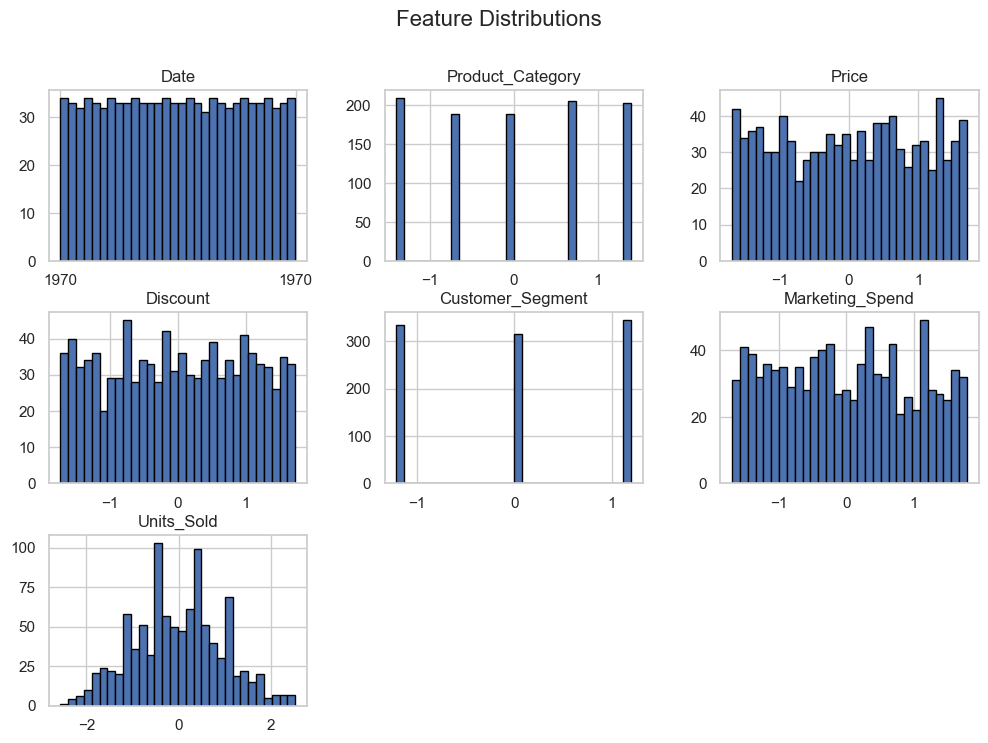

In [61]:
# Histogram for Data Distribution
plt.figure(figsize=(12, 6))
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

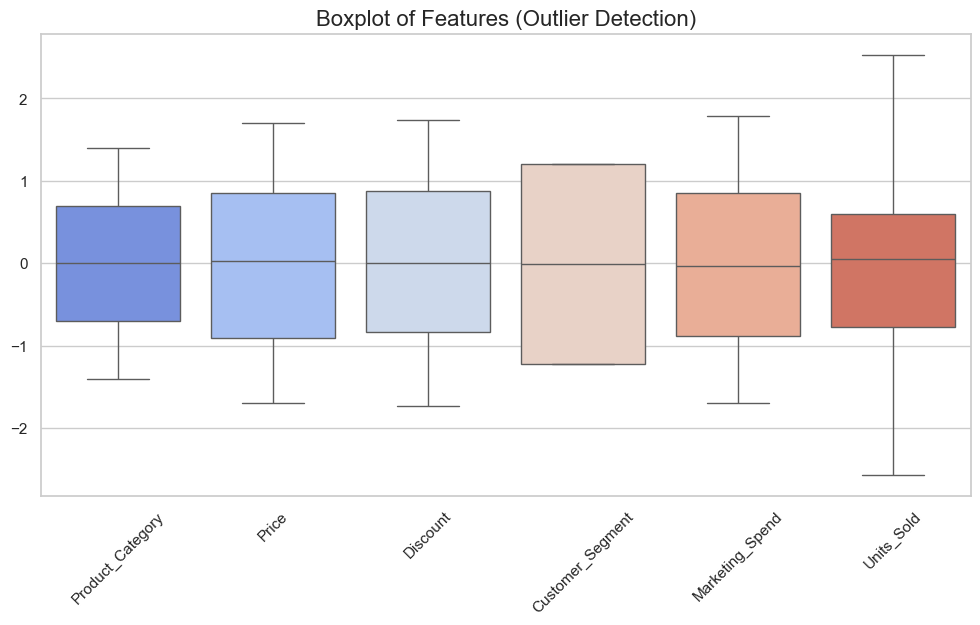

In [63]:
# Boxplot to Check Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="coolwarm")
plt.title("Boxplot of Features (Outlier Detection)", fontsize=16)
plt.xticks(rotation=45)
plt.show()

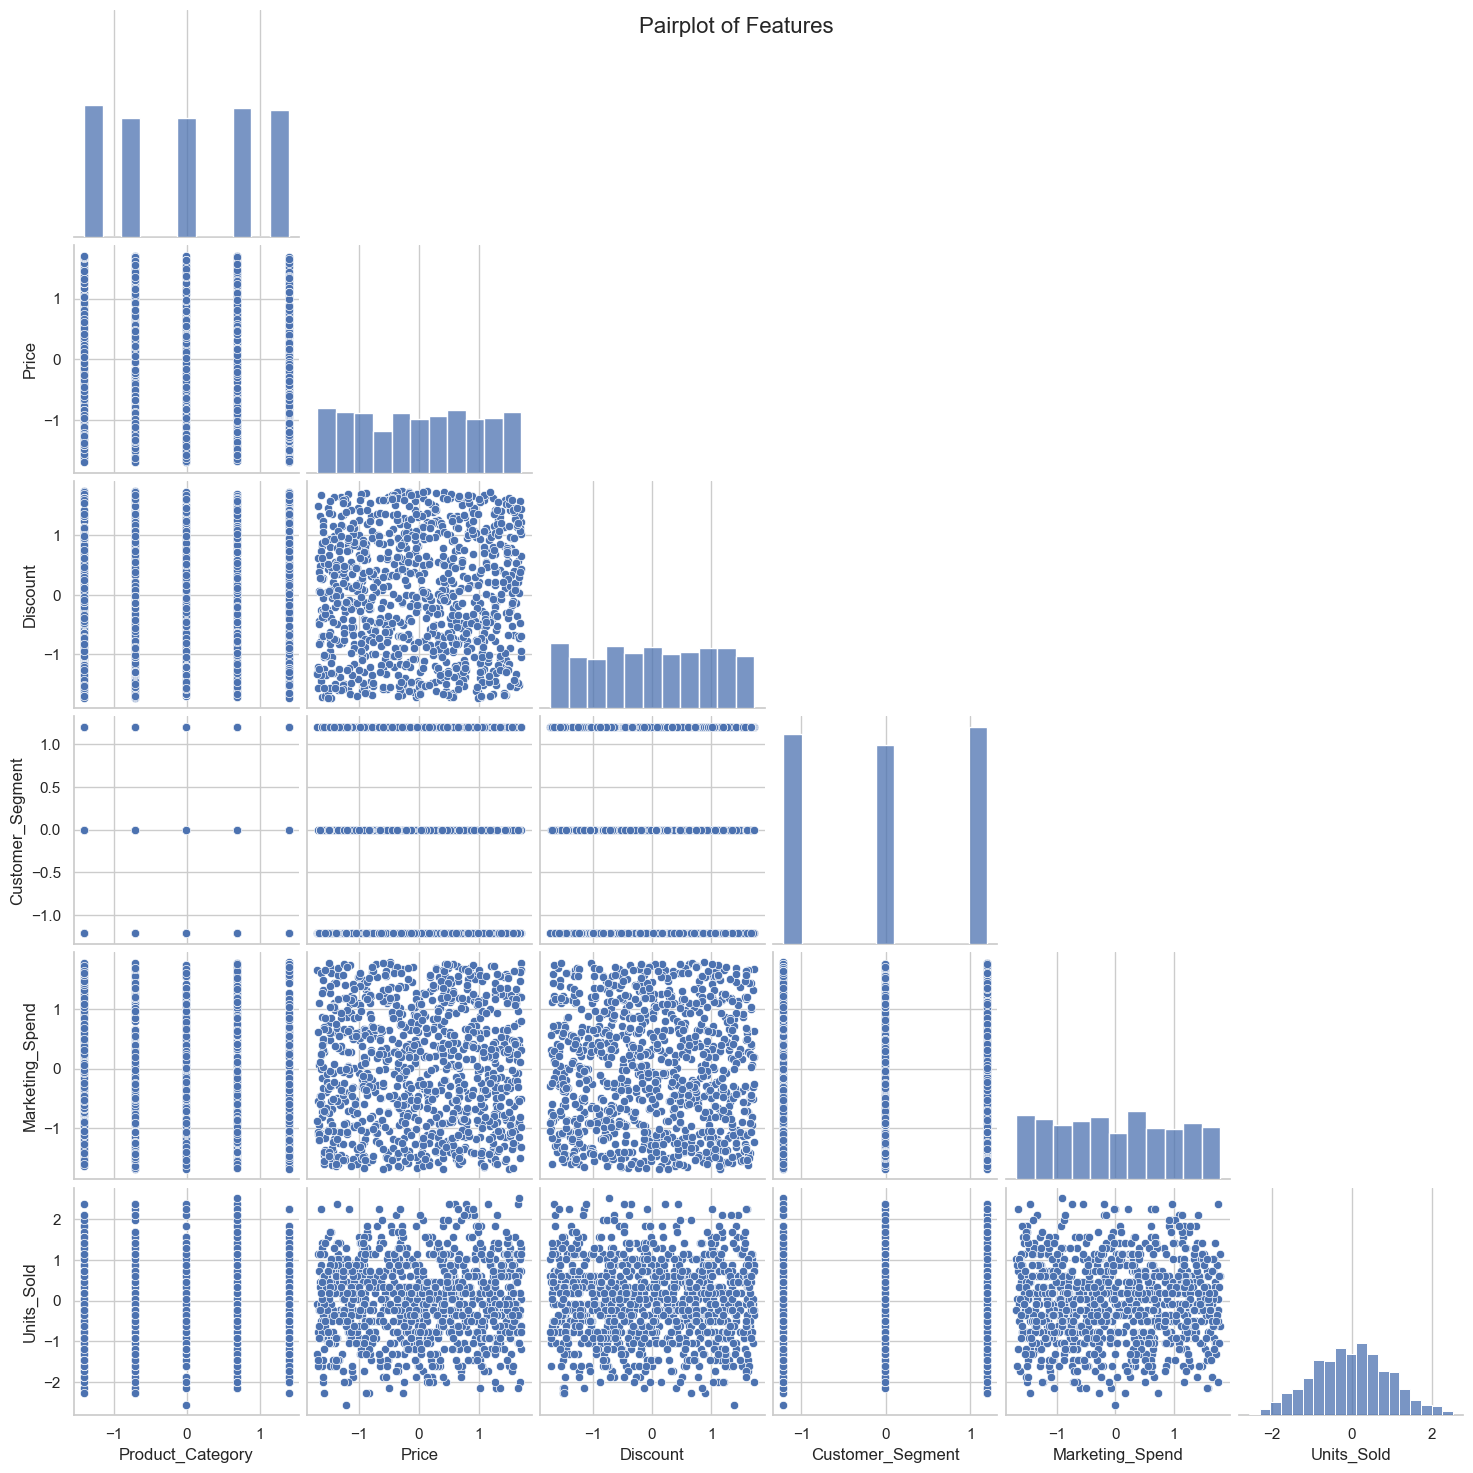

In [65]:
# Pairplot for Feature Relationships (Only Numeric Columns)
df_numeric = df.select_dtypes(include=[np.number])
sns.pairplot(df_numeric, diag_kind="hist", corner=True)  # hist instead of kde to avoid errors
plt.suptitle("Pairplot of Features", fontsize=16)
plt.show()

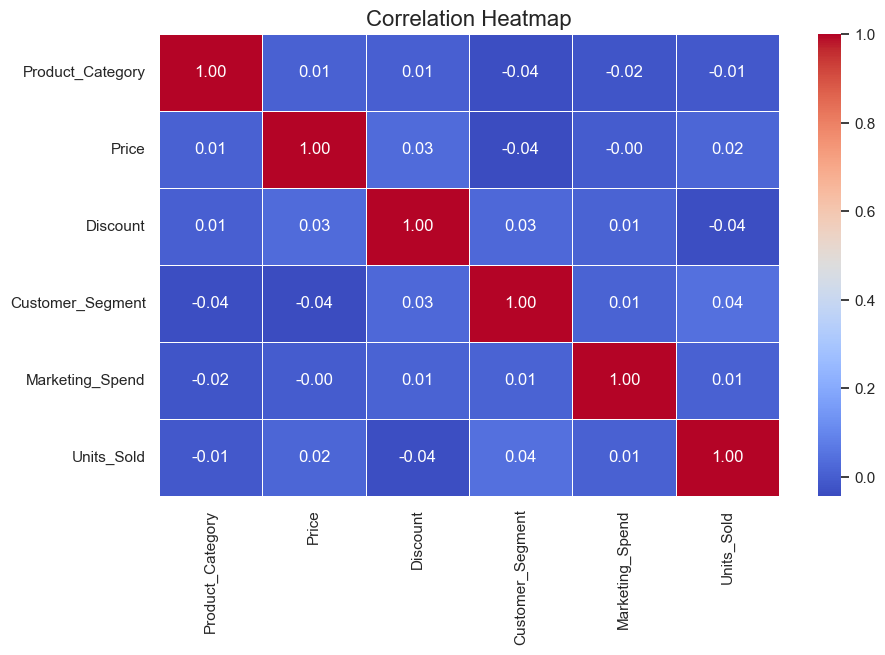

In [67]:
# Heatmap for Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()